<p style="text-align:center" ><font size="10"><b>Varun Kamath</b></font></p>

<p style="text-align:center" ><b>Task 3: Perform Exploratory Data Analysis</b></p>

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import OrderedDict
%matplotlib inline

In [2]:
# Import Dataset
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
# Pandas Profiling
from ydata_profiling import ProfileReport
ProfileReport(df, title="Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Questions?
- ✅ How does Discount affect profit
- ❌ How does Quantity affect Profit
- ❌ How does location i.e City, Region, State (Maybe Postal Code) affect Profit
- ❌ How does Ship Mode affect Profit
- ❌ What about furnitures and technology with less discount, how does that affect profit

# <b>Notes</b>
- Machines & Bookcases for some reason falls in both very less profit and less profit region
- Appliances fall in both high profit and low profit due to discount vairation, check the mean discount in each
## Columns to look into
      - Discount
      - Quantity
      - City
      - Region
      - Category


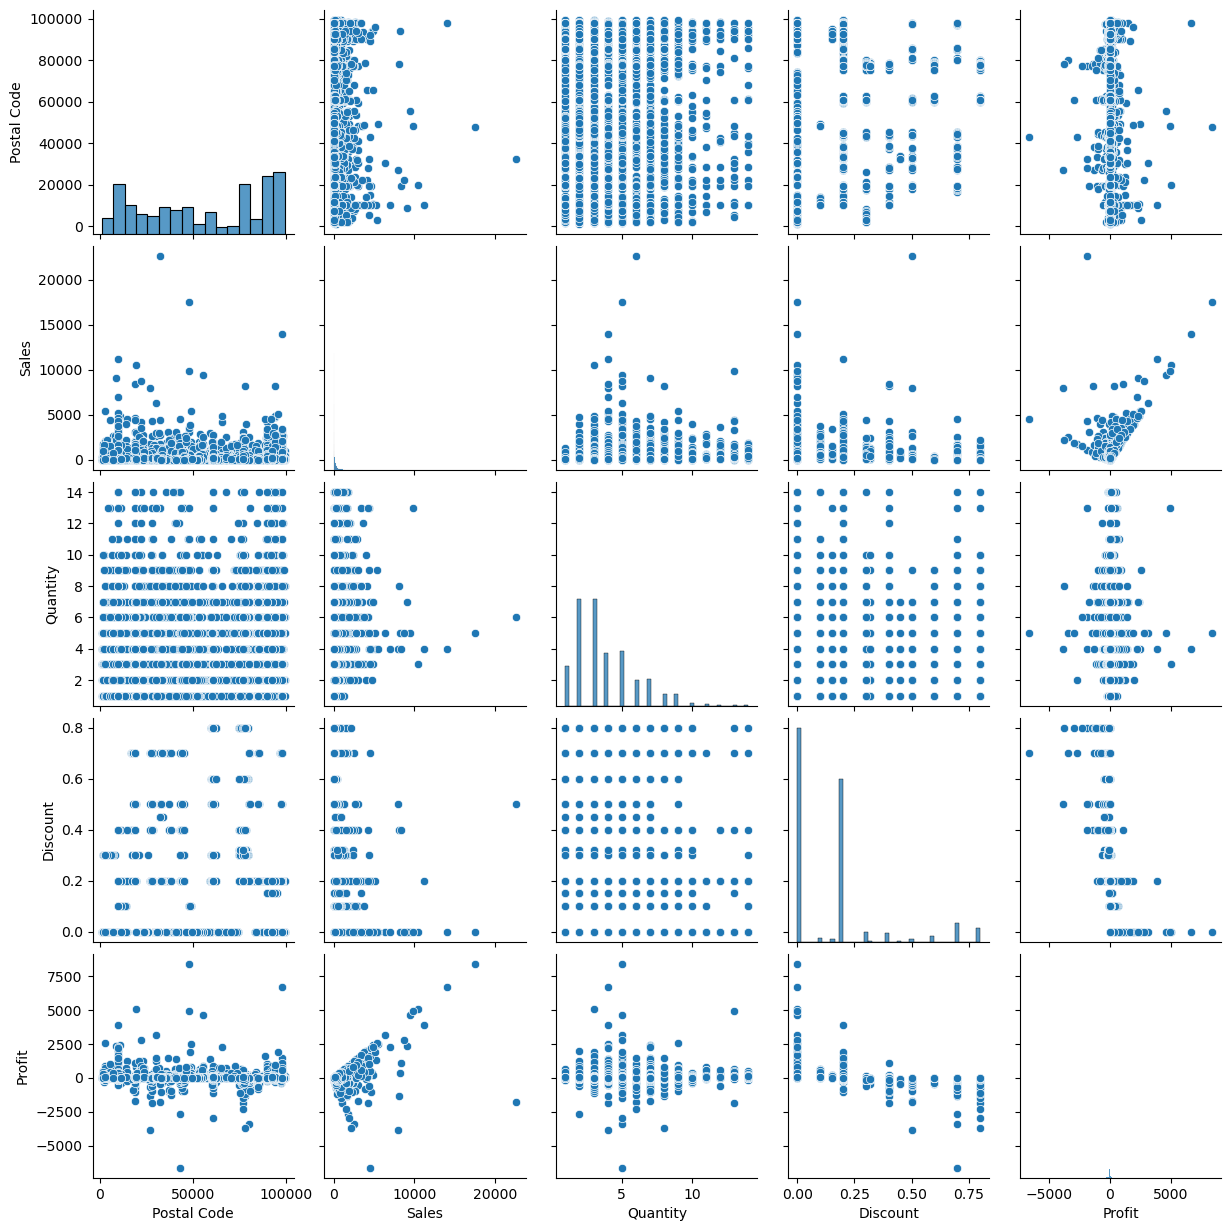

In [4]:
sns.pairplot(df)

## <b>How Discount Affects Profit</b>

<AxesSubplot: xlabel='Discount', ylabel='Profit'>

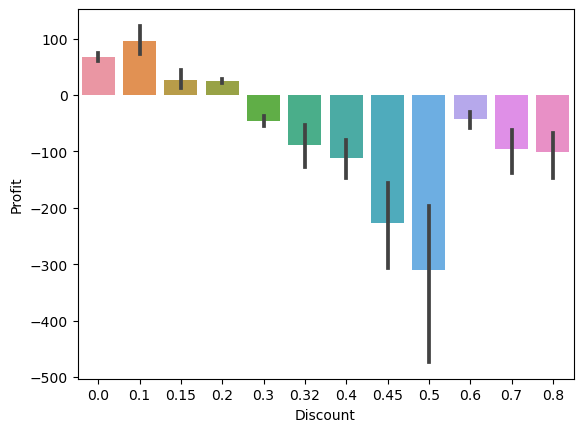

In [5]:
sns.barplot(x='Discount',y='Profit',data=df,)

In [6]:
df[df.Sales > 20000] # Outlier in Profit Vs Sales

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2697,Standard Class,Home Office,United States,Jacksonville,Florida,32216,South,Technology,Machines,22638.48,6,0.5,-1811.0784


### <b>Items which give Loss</b>

In [7]:
df_disctG =  df[df.Discount > 0.42] # All rows with Discount greater than 0.42
df_disct_VLP = df_disctG[df_disctG.Discount < 0.52] # VERY LESS PROFIT # All rows with Discount Greater than 0.42 and less than 0.52 
print(df_disctG['Sub-Category'].unique())
print(df_disct_VLP['Sub-Category'].unique())

['Tables' 'Appliances' 'Binders' 'Bookcases' 'Furnishings' 'Machines']
['Tables' 'Bookcases' 'Machines']


In [8]:
print("Mean Loss loss of selling Tables at high discount : ",round(abs(df_disct_VLP[df_disct_VLP['Sub-Category'] == 'Tables']['Profit'].mean()),3))
print("Mean Loss loss of selling Bookcases at high discount : ",round(abs(df_disct_VLP[df_disct_VLP['Sub-Category'] == 'Bookcases']['Profit'].mean()),3))
print("Mean Loss loss of selling Machines at high discount : ",round(abs(df_disct_VLP[df_disct_VLP['Sub-Category'] == 'Machines']['Profit'].mean()),3))

Mean Loss loss of selling Tables at high discount :  236.351
Mean Loss loss of selling Bookcases at high discount :  236.434
Mean Loss loss of selling Machines at high discount :  636.269


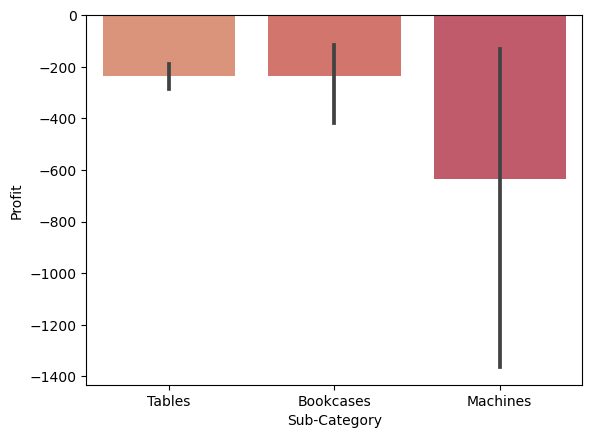

In [9]:
with sns.color_palette("flare"):
    sns.barplot(x=df_disct_VLP['Sub-Category'],y='Profit',data=df_disct_VLP)

In [10]:
df_disct_LP = df_disctG[df_disctG.Discount > 0.52] # LESS PROFIT # All rows with Discount Greater than 0.52
print(df_disct_LP['Sub-Category'].unique())

['Appliances' 'Binders' 'Furnishings' 'Machines' 'Bookcases']


In [11]:
print("Mean Loss of selling Appliances at high discount : $",round(abs(df_disct_LP[df_disct_LP['Sub-Category'] == 'Appliances']['Profit'].mean()),3))
print("Mean Loss of selling Binders at high discount : $",round(abs(df_disct_LP[df_disct_LP['Sub-Category'] == 'Binders']['Profit'].mean()),3))
print("Mean Loss of selling Furnishings at high discount : $",round(abs(df_disct_LP[df_disct_LP['Sub-Category'] == 'Furnishings']['Profit'].mean()),3))

Mean Loss of selling Appliances at high discount : $ 128.801
Mean Loss of selling Binders at high discount : $ 62.823
Mean Loss of selling Furnishings at high discount : $ 43.077


### <b>Items which give Profit</b>

In [12]:
df_disct_P = df[df.Profit > 0] # LESS PROFIT # All rows with Profit > 0
print(df_disct_P['Sub-Category'].unique())

['Bookcases' 'Chairs' 'Labels' 'Storage' 'Furnishings' 'Art' 'Phones'
 'Binders' 'Appliances' 'Tables' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


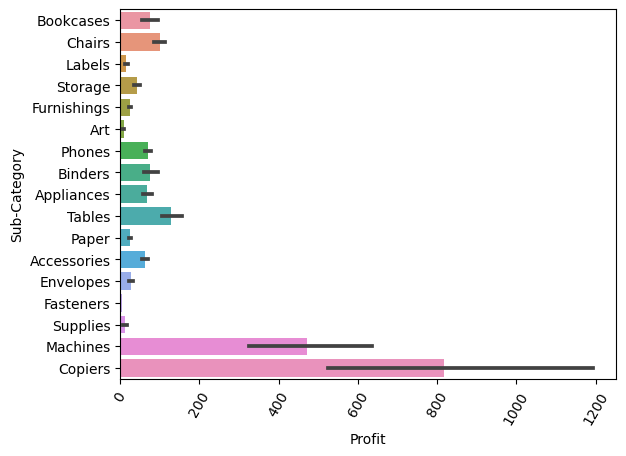

In [14]:
with sns.color_palette("flare"):
    sns.barplot(y=df_disct_P['Sub-Category'],x='Profit',data=df_disct_P)
    plt.xticks(rotation=60)

In [15]:
# What to sell at Low Discounts
PD_SC_Uniq = df_disct_P['Sub-Category'].unique()
mean_P_all = {}
for sc in PD_SC_Uniq:
    mean_P_all[sc] = (round(abs(df_disct_P[df_disct_P['Sub-Category'] == sc]['Profit'].mean()),3))
# print(mean_P_all)
keys = list(mean_P_all.keys())
values = list(mean_P_all.values())
sorted_value_index = np.argsort(values)
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}
print(sorted_dict)
P_top_5 = {k:sorted_dict[k] for k in list(sorted_dict.keys())[-5:]}

{'Fasteners': 4.914, 'Art': 8.201, 'Supplies': 11.634, 'Labels': 15.237, 'Paper': 24.857, 'Furnishings': 25.032, 'Envelopes': 27.418, 'Storage': 41.914, 'Accessories': 62.763, 'Appliances': 67.087, 'Phones': 69.303, 'Bookcases': 74.185, 'Binders': 75.53, 'Chairs': 100.749, 'Tables': 128.83, 'Machines': 471.879, 'Copiers': 817.909}


In [16]:
print("TOP 5 Profit gaining sub-categories: ",P_top_5)

TOP 5 Profit gaining sub-categories:  {'Binders': 75.53, 'Chairs': 100.749, 'Tables': 128.83, 'Machines': 471.879, 'Copiers': 817.909}


### <b>Finding Mean Discounts on each of the top 5 Profit gaining Sub-Categories</b>

In [17]:
P_MD_top_5 = list(P_top_5.keys())
print()
for i in P_MD_top_5:
    print("Mean Discount for ",i," : ",round(df_disct_P[df_disct_P['Sub-Category'] == i]['Discount'].mean(),2))


Mean Discount for  Binders  :  0.13
Mean Discount for  Chairs  :  0.11
Mean Discount for  Tables  :  0.08
Mean Discount for  Machines  :  0.14
Mean Discount for  Copiers  :  0.16


## <b>How Location Affects Profit</b>

In [26]:
df.head(7)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656


In [27]:
regions = df['Region'].unique()
mean_P_reg_all = {}
for i in regions:
    mean_P_reg_all[i] = round(df[df['Region'] == i]['Profit'].mean(),3)
print("Mean Profit",mean_P_reg_all)

{'South': 28.858, 'West': 33.849, 'Central': 17.093, 'East': 32.136}


### Top 3 Regions with high profit : West, East and South

In [279]:
states = df['State'].unique() # Name of each State in dataframe

df_west = df[df['Region'] == 'West'] # Dataframe of the entire West region
df_east = df[df['Region'] == 'East'] # Dataframe of the entire East region
df_south = df[df['Region'] == 'South'] # Dataframe of the entire South region

west_state = df_west['State'].unique() # Name of each state in the West region
east_state = df_east['State'].unique() # Name of each state in the East region
south_state = df_south['State'].unique() # Name of each state in the South region

# print(df_west['State'].unique())
# print(df_east['State'].unique())
# print(df_south['State'].unique())

west_state_city = {}     # Dictionary as {State:List(City)} in West Region
MP_west_state_list = []  # Mean Profit of all States in the West Region
MP_west_city_list = []   # Mean Profit of all City in the West Region

east_state_city = {}     # Dictionary as {State:List(City)} in East Region
MP_east_state_list = []  # Mean Profit of all States in the West Region
MP_east_city_list = []   # Mean Profit of all City in the West Region

south_state_city = {}    # Dictionary as {State:List(City)} in South Region
MP_south_state_list = [] # Mean Profit of all States in the West Region
MP_south_city_list = []  # Mean Profit of all City in the West Region

# Making Dictionary for state and their cities
for i in west_state:
    west_state_city[i] = df_west[df_west['State'] == i]['City'].unique()

for i in east_state:
    east_state_city[i] = df_east[df_east['State'] == i]['City'].unique()

for i in south_state:
    south_state_city[i] = df_south[df_south['State'] == i]['City'].unique()
# print(west_state_city)
# print(east_state_city)
# print(south_state_city)

In [280]:
# Modifying Dictionary to get mean profit of each city in West Region States
# WEST
for state in west_state:
    i = 0
    df_west_state = df_west[df_west['State'] == state]
    MP_west_state = round(df_west_state['Profit'].mean(),3)
    MP_west_state_list.append((state,MP_west_state))
    for city in west_state_city[state]:
        df_west_state_city = df_west_state[df_west_state['City'] == city]
        if(type(west_state_city[state][i]) == str):
            MP_west_state_city = round(df_west_state_city['Profit'].mean(),3)
            MP_west_city_list.append(("West",state,city,MP_west_state_city))
            west_state_city[state][i] = (city,MP_west_state_city)
        i+=1
print(MP_west_state_list)
print(MP_west_city_list)
# west_state_city

[('California', 38.172), ('Washington', 66.013), ('Utah', 48.048), ('Arizona', -15.303), ('Oregon', -9.601), ('Colorado', -35.867), ('New Mexico', 31.273), ('Nevada', 85.045), ('Montana', 122.222), ('Idaho', 39.368), ('Wyoming', 100.196)]
[('West', 'California', 'Los Angeles', 40.751), ('West', 'California', 'San Francisco', 34.328), ('West', 'California', 'Roseville', 22.639), ('West', 'California', 'Pasadena', 17.199), ('West', 'California', 'San Jose', 28.954), ('West', 'California', 'Redlands', 28.385), ('West', 'California', 'Whittier', 44.477), ('West', 'California', 'Santa Clara', 12.667), ('West', 'California', 'San Diego', 37.513), ('West', 'California', 'Brentwood', 76.051), ('West', 'California', 'Inglewood', 64.168), ('West', 'California', 'Long Beach', 27.644), ('West', 'California', 'Hesperia', 24.632), ('West', 'California', 'Huntington Beach', 146.673), ('West', 'California', 'Concord', 35.303), ('West', 'California', 'Costa Mesa', 27.019), ('West', 'California', 'Anahe

In [281]:
# Modifying Dictionary to get mean profit of each city in West Region States
# EAST
for state in east_state:
    i = 0
    df_east_state = df_east[df_east['State'] == state]
    MP_east_state = round(df_east_state['Profit'].mean(),3)
    MP_east_state_list.append((state,MP_east_state))
    for city in east_state_city[state]:
        df_east_state_city = df_east_state[df_east_state['City'] == city]
        if(type(east_state_city[state][i]) == str):
            MP_east_state_city = round(df_east_state_city['Profit'].mean(),3)
            MP_east_city_list.append(("East",state,city,MP_east_state_city))
            east_state_city[state][i] = (city,MP_east_state_city)
        i+=1
print(MP_east_state_list)
print(MP_east_city_list)
# east_state_city

[('Pennsylvania', -26.508), ('Delaware', 103.931), ('New York', 65.637), ('Ohio', -36.186), ('Connecticut', 42.823), ('New Jersey', 75.176), ('Massachusetts', 50.263), ('Rhode Island', 130.101), ('New Hampshire', 63.204), ('Maryland', 66.964), ('District of Columbia', 105.959), ('Vermont', 204.089), ('Maine', 56.811), ('West Virginia', 46.48)]
[('East', 'Pennsylvania', 'Philadelphia', -25.769), ('East', 'Pennsylvania', 'Chester', 3.022), ('East', 'Pennsylvania', 'Lancaster', -16.889), ('East', 'Pennsylvania', 'Allentown', -32.35), ('East', 'Pennsylvania', 'Reading', -53.753), ('East', 'Pennsylvania', 'York', -20.434), ('East', 'Pennsylvania', 'Altoona', -0.592), ('East', 'Pennsylvania', 'Bethlehem', -200.619), ('East', 'Delaware', 'Dover', 12.903), ('East', 'Delaware', 'Wilmington', 65.743), ('East', 'Delaware', 'Newark', 134.77), ('East', 'New York', 'New York City', 67.8), ('East', 'New York', 'Troy', 22.029), ('East', 'New York', 'New Rochelle', 40.935), ('East', 'New York', 'Auburn

In [282]:
# Modifying Dictionary to get mean profit of each city in West Region States
# SOUTH
for state in south_state:
    i = 0
    df_south_state = df_south[df_south['State'] == state]
    MP_south_state = round(df_south_state['Profit'].mean(),3)
    MP_south_state_list.append((state,MP_south_state))
    for city in south_state_city[state]:
        df_south_state_city = df_south_state[df_south_state['City'] == city]
        if(type(south_state_city[state][i]) == str):
            MP_south_state_city = round(df_south_state_city['Profit'].mean(),3)
            MP_south_city_list.append(("South",state,city,MP_south_state_city))
            south_state_city[state][i] = (city,MP_south_state_city)
        i+=1
print(MP_south_state_list)
print(MP_south_city_list)
# south_state_city

[('Kentucky', 80.573), ('Florida', -8.875), ('North Carolina', -30.084), ('Virginia', 83.027), ('Tennessee', -29.19), ('Alabama', 94.866), ('South Carolina', 42.12), ('Louisiana', 52.288), ('Georgia', 88.315), ('Mississippi', 59.867), ('Arkansas', 66.811)]
[('South', 'Kentucky', 'Henderson', 94.142), ('South', 'Kentucky', 'Richmond', 66.931), ('South', 'Kentucky', 'Louisville', 59.876), ('South', 'Kentucky', 'Florence', 183.735), ('South', 'Kentucky', 'Murray', 47.233), ('South', 'Kentucky', 'Bowling Green', 33.558), ('South', 'Kentucky', 'Georgetown', 50.345), ('South', 'Kentucky', 'Owensboro', 13.821), ('South', 'Florida', 'Fort Lauderdale', -10.757), ('South', 'Florida', 'Melbourne', 9.562), ('South', 'Florida', 'Tampa', -9.034), ('South', 'Florida', 'Tamarac', -87.974), ('South', 'Florida', 'Saint Petersburg', 10.856), ('South', 'Florida', 'Pembroke Pines', -5.175), ('South', 'Florida', 'Miami', -20.182), ('South', 'Florida', 'Jacksonville', -32.609), ('South', 'Florida', 'Lakeland

In [269]:
# print(MP_west_state_list)
# df_west['State'].unique()
len(df['City'].unique())

531

In [315]:
MP_all_city = []
for i in MP_west_city_list:
    MP_all_city.append(i)
for i in MP_east_city_list:
    MP_all_city.append(i)
for i in MP_south_city_list:
    MP_all_city.append(i)
MP_all_city.sort(key=lambda a: a[3])

# MP_all_city.reverse()
MP_all_city[-1]

('East', 'New York', 'Jamestown', 642.886)

<AxesSubplot: >

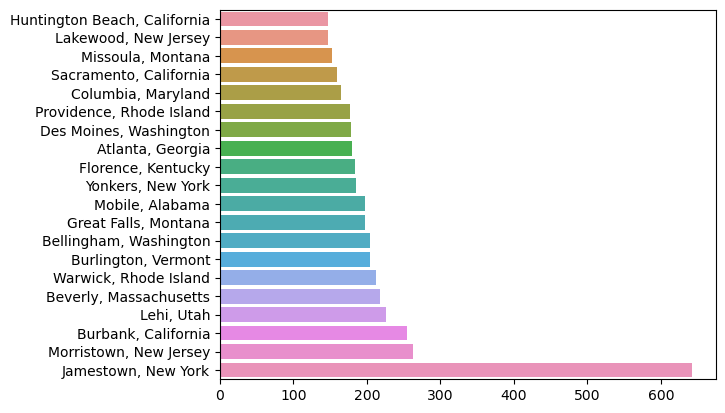

In [314]:
sns.barplot(y=[i[2]+", "+i[1] for i in MP_all_city[-20:]],x=[i[3] for i in MP_all_city[-20:]])
# plt.xticks(rotation=-90)

<AxesSubplot: >

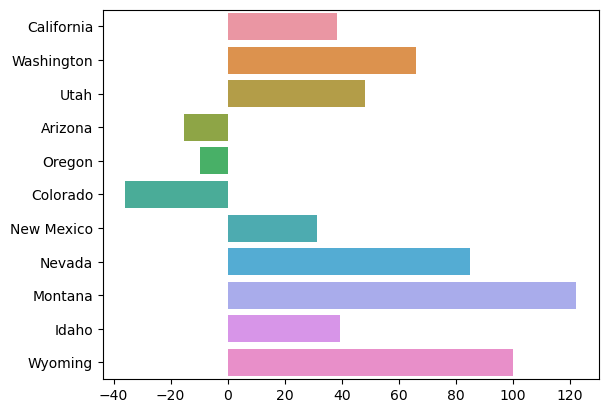

In [291]:
# plt.xticks(rotation=60)
# WEST
sns.barplot(y=[x[0] for x in MP_west_state_list],x=[i[1] for i in MP_west_state_list])

<AxesSubplot: >

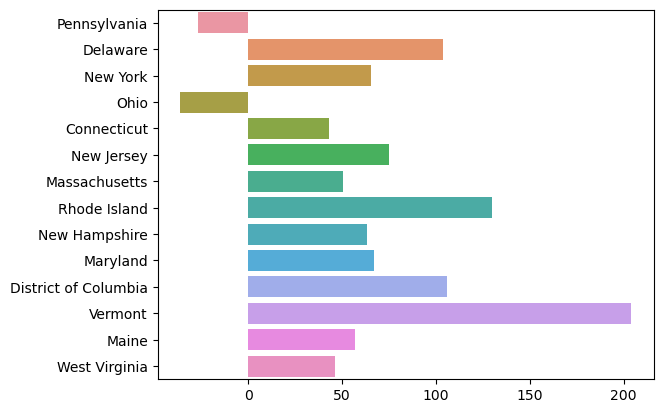

In [286]:
# East
sns.barplot(y=[x[0] for x in MP_east_state_list],x=[i[1] for i in MP_east_state_list])

<AxesSubplot: >

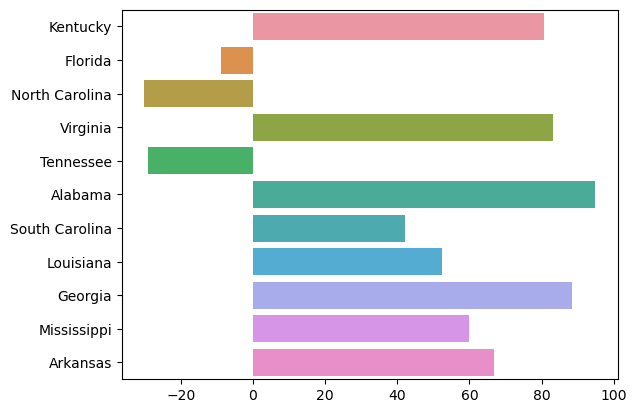

In [287]:
# South
sns.barplot(y=[x[0] for x in MP_south_state_list],x=[i[1] for i in MP_south_state_list])

# <center><b>Inferences</b></center>

- Giving more discount on Tables, Bookcases & Machines brings big loss
- Selling Machines at high Discount gives the most loss and selling Furnishings at high discount gives less loss
    - Mean Loss of selling 'Tables' at high discount :  $ 236.351
    - Mean Loss of selling 'Bookcases' at high discount :  $ 236.434 ## (CHECK AGAIN :: Bookcases fall on both high and low loss regions)
    - Mean Loss of selling 'Machines' at high discount :  $ 636.269 ## (CHECK AGAIN :: Machines fall on both high and low loss regions)
    - Mean Loss of selling Appliances at high discount : $ 128.801
    - Mean Loss of selling Binders at high discount : $ 62.823
    - Mean Loss of selling Furnishings at high discount : $ 43.077
- Giving more discount on Appliances, Binders & Furnishings gives less Profit but not as less as selling Tables, Bookcases & Machines
- Binders, Chairs, Tables, Machines & Copiers are the top 5 profit gaining Sub-Categories
    - Mean Discount for  Binders  :  0.13
    - Mean Discount for  Chairs  :  0.11
    - Mean Discount for  Tables  :  0.08
    - Mean Discount for  Machines  :  0.14
    - Mean Discount for  Copiers  :  0.16
- Top 3 Regions with high profit : West > East > South
- Central Region even though it has more entries it has a low mean profit as compared to East,West and South
- South has less entries and almost same mean profit as East and West which has more entries than South
- Should not sell at Florida, North Carolina and Tennessee in the South
- Should not sell at Ohio and Pennsylvania in the East
- Should not see at Arizona, Oregon and Colorado in the West
- Jamestown, New York, East region has very high mean profit of $ 642.886
